In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset_sudeste_realista_outliers-1k.csv")

In [3]:
df.head(10)

,id,idade,renda,cidade,categoria,nota,feedback
0,1,17.0,29603.70,Belo Horizonte,B,7.6,Bom
1,2,41.0,28280.80,Rio de Janeiro,B,8.9,Bom
2,3,49.0,43104.31,Belo Horizonte,B,6.5,Bom
3,4,49.0,9703.29,Rio de Janeiro,A,5.3,Bom
4,5,68.0,22365.79,Belo Horizonte,B,5.6,Bom
5,6,22.0,27940.25,Rio de Janeiro,B,7.8,Bom
6,7,73.0,44541.67,São Paulo,A,8.0,Bom
7,8,57.0,28886.65,Rio de Janeiro,B,9.2,Bom
8,9,19.0,33782.52,Rio de Janeiro,A,9.1,Bom
9,10,52.0,29801.49,Vitória,B,7.5,Bom


In [4]:
print("### Informações gerais do Dataset ###\n")
df.info()

### Informações gerais do Dataset ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   idade      994 non-null    float64
 2   renda      991 non-null    float64
 3   cidade     990 non-null    object 
 4   categoria  995 non-null    object 
 5   nota       991 non-null    float64
 6   feedback   964 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [5]:
print("\n### Descrição estatística ###")
print(df.describe())


### Descrição estatística ###
                id       idade         renda        nota
count  1000.000000  994.000000    991.000000  991.000000
mean    500.500000   48.622736  24072.921140    7.421695
std     288.819436   19.726415  13536.222864    1.528445
min       1.000000    3.000000    786.050000    0.300000
25%     250.750000   32.000000  12366.885000    6.200000
50%     500.500000   49.000000  24039.370000    7.500000
75%     750.250000   65.000000  35039.585000    8.700000
max    1000.000000  110.000000  86875.340000   10.000000


In [6]:
print(df.describe(include='all'))

                 id       idade         renda          cidade categoria  \
count   1000.000000  994.000000    991.000000             990       995   
unique          NaN         NaN           NaN               4         2   
top             NaN         NaN           NaN  Belo Horizonte         A   
freq            NaN         NaN           NaN             265       524   
mean     500.500000   48.622736  24072.921140             NaN       NaN   
std      288.819436   19.726415  13536.222864             NaN       NaN   
min        1.000000    3.000000    786.050000             NaN       NaN   
25%      250.750000   32.000000  12366.885000             NaN       NaN   
50%      500.500000   49.000000  24039.370000             NaN       NaN   
75%      750.250000   65.000000  35039.585000             NaN       NaN   
max     1000.000000  110.000000  86875.340000             NaN       NaN   

              nota feedback  
count   991.000000      964  
unique         NaN        1  
top      

In [7]:
print("\n### Contagem de valores ausentes ###")
print(df.isnull().sum())


### Contagem de valores ausentes ###
id            0
idade         6
renda         9
cidade       10
categoria     5
nota          9
feedback     36
dtype: int64


In [8]:
I_Q1 = df['idade'].quantile(0.25)
I_Q3 = df['idade'].quantile(0.75)
I_IQR = I_Q3 - I_Q1
limite_inferior_I = I_Q1 - 1.5 * I_IQR
limite_superior_I = I_Q3 + 1.5 * I_IQR

R_Q1 = df['renda'].quantile(0.25)
R_Q3 = df['renda'].quantile(0.75)
R_IQR = R_Q3 - R_Q1
limite_inferior_R = R_Q1 - 1.5 * R_IQR
limite_superior_R = R_Q3 + 1.5 * R_IQR

N_Q1 = df['nota'].quantile(0.25)
N_Q3 = df['nota'].quantile(0.75)
N_IQR = N_Q3 - N_Q1
limite_inferior_N = N_Q1 - 1.5 * N_IQR
limite_superior_N = N_Q3 + 1.5 * N_IQR

In [9]:
print (f"\n\n\t IQR - Campo Idade\n\n")
print(f"Quartis -> Q1: {I_Q1:-8.2f}  ->  Q3: {I_Q3:-8.2f}")
print(f"IQR ----- {I_IQR}")
print(f"Limites - Inf: {limite_inferior_I:-8.2f}  -> Sup: {limite_superior_I:-8.2f}")
print(f"\n\n")

print('\n--------------x--------------\n')

print (f"\n\n\t IQR - Campo Renda\n\n")
print(f"Quartis -> Q1: {R_Q1:-8.2f}  ->  Q3: {R_Q3:-8.2f}")
print(f"IQR ----- {R_IQR}")
print(f"Limites - Inf: {limite_inferior_R:-8.2f}  -> Sup: {limite_superior_R:-8.2f}")
print(f"\n\n")

print('\n--------------x--------------\n')

print (f"\n\n\t IQR - Campo Nota\n\n")
print(f"Quartis -> Q1: {N_Q1:-8.2f}  ->  Q3: {N_Q3:-8.2f}")
print(f"IQR ----- {N_IQR}")
print(f"Limites - Inf: {limite_inferior_N:-8.2f}  -> Sup: {limite_superior_N:-8.2f}")
print(f"\n\n")

print('\n--------------x--------------\n')



	 IQR - Campo Idade


Quartis -> Q1:    32.00  ->  Q3:    65.00
IQR ----- 33.0
Limites - Inf:   -17.50  -> Sup:   114.50




--------------x--------------



	 IQR - Campo Renda


Quartis -> Q1: 12366.89  ->  Q3: 35039.58
IQR ----- 22672.699999999997
Limites - Inf: -21642.16  -> Sup: 69048.63




--------------x--------------



	 IQR - Campo Nota


Quartis -> Q1:     6.20  ->  Q3:     8.70
IQR ----- 2.499999999999999
Limites - Inf:     2.45  -> Sup:    12.45




--------------x--------------



In [10]:
outliers = df[(df['idade'] < limite_inferior_I) | (df['idade'] > limite_superior_I)]
print(f"\n### Possíveis outliers em 'idade' ###\n\n{outliers}\n")

outliers = df[(df['renda'] < limite_inferior_R) | (df['renda'] > limite_superior_R)]
print(f"\n### Possíveis outliers em 'renda' ###\n\n{outliers}\n")

outliers = df[(df['nota'] < limite_inferior_N) | (df['nota'] > limite_superior_N)]
print(f"\n### Possíveis outliers em 'nota' ###\n\n{outliers}\n")


### Possíveis outliers em 'idade' ###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []


### Possíveis outliers em 'renda' ###

      id  idade     renda          cidade categoria  nota feedback
149  150    4.0  86875.34  Rio de Janeiro         A   2.9      Bom
186  187  109.0  78557.62  Rio de Janeiro         A   0.3      Bom
640  641   11.0  82975.79       São Paulo         A   0.5      Bom


### Possíveis outliers em 'nota' ###

      id  idade     renda          cidade categoria  nota feedback
186  187  109.0  78557.62  Rio de Janeiro         A   0.3      Bom
250  251  110.0   1464.08         Vitória         A   1.5      Bom
640  641   11.0  82975.79       São Paulo         A   0.5      Bom
855  856   91.0  60333.87       São Paulo         B   1.3      Bom



In [11]:
mean_idade = df['idade'].median()
mean_nota = df['nota'].median()
median_renda = df['renda'].mean()

In [12]:
print(f"Media das Idades {mean_idade}")
print(f"Media das Notas {mean_nota}")
print(f"Mediana das Rendas {median_renda} - {median_renda:.2f}")

Media das Idades 49.0
Media das Notas 7.5
Mediana das Rendas 24072.92114026236 - 24072.92


In [13]:
df['idade'] = df['idade'].fillna(mean_idade)
df['nota'] = df['nota'].fillna(mean_nota)
df['renda'] = df['renda'].fillna(median_renda)

In [14]:
df['cidade'] = df['cidade'].fillna("Desconhecido")
df['feedback'] = df['feedback'].fillna("Desconhecido")
#df['categoria'] = df['categoria'].fillna(mode_categoria)

In [15]:
df['categoria'] = (
    df['categoria']
        .replace(r'^\s*$', np.nan, regex=True)   
        .str.strip()                             
)

moda = df['categoria'].mode().iloc[0]

df['categoria'] = df['categoria'].fillna(moda)

In [16]:
df.head(10)

,id,idade,renda,cidade,categoria,nota,feedback
0,1,17.0,29603.70,Belo Horizonte,B,7.6,Bom
1,2,41.0,28280.80,Rio de Janeiro,B,8.9,Bom
2,3,49.0,43104.31,Belo Horizonte,B,6.5,Bom
3,4,49.0,9703.29,Rio de Janeiro,A,5.3,Bom
4,5,68.0,22365.79,Belo Horizonte,B,5.6,Bom
5,6,22.0,27940.25,Rio de Janeiro,B,7.8,Bom
6,7,73.0,44541.67,São Paulo,A,8.0,Bom
7,8,57.0,28886.65,Rio de Janeiro,B,9.2,Bom
8,9,19.0,33782.52,Rio de Janeiro,A,9.1,Bom
9,10,52.0,29801.49,Vitória,B,7.5,Bom


In [17]:
print(df.isnull().sum())

id           0
idade        0
renda        0
cidade       0
categoria    0
nota         0
feedback     0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   idade      1000 non-null   float64
 2   renda      1000 non-null   float64
 3   cidade     1000 non-null   object 
 4   categoria  1000 non-null   object 
 5   nota       1000 non-null   float64
 6   feedback   1000 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


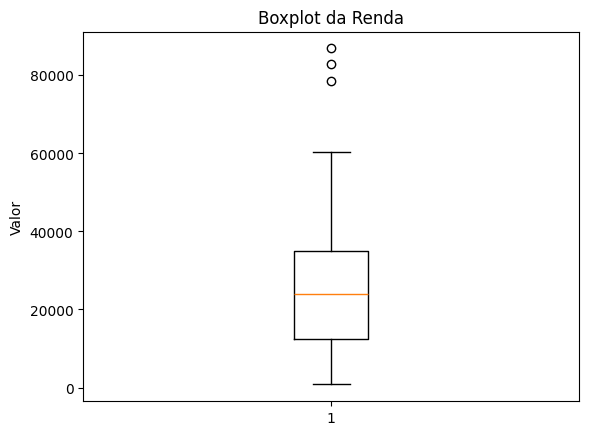

In [19]:
plt.boxplot(df['renda'])
plt.title("Boxplot da Renda")
plt.ylabel("Valor")
plt.show()

In [21]:
df_clean = df[(df['renda'] >= limite_inferior_R) & (df['renda'] <= limite_superior_R)].copy()

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         997 non-null    int64  
 1   idade      997 non-null    float64
 2   renda      997 non-null    float64
 3   cidade     997 non-null    object 
 4   categoria  997 non-null    object 
 5   nota       997 non-null    float64
 6   feedback   997 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 62.3+ KB


In [24]:
outliers_v2 = df_clean[(df_clean['renda'] < limite_inferior_R) | (df_clean['renda'] > limite_superior_R)]
print(f"\n### Possíveis outliers em 'renda' ###\n\n{outliers_v2}\n")


### Possíveis outliers em 'renda' ###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []



In [25]:
df_encoded = pd.get_dummies(df, columns=['cidade','categoria','feedback'], drop_first=False)

In [26]:
df_encoded_v2 = pd.get_dummies(
    df, 
    columns=['cidade', 'categoria', 'feedback'], 
    drop_first=False,
    dtype=int  
)

In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   int64  
 1   idade                  1000 non-null   float64
 2   renda                  1000 non-null   float64
 3   nota                   1000 non-null   float64
 4   cidade_Belo Horizonte  1000 non-null   bool   
 5   cidade_Desconhecido    1000 non-null   bool   
 6   cidade_Rio de Janeiro  1000 non-null   bool   
 7   cidade_São Paulo       1000 non-null   bool   
 8   cidade_Vitória         1000 non-null   bool   
 9   categoria_A            1000 non-null   bool   
 10  categoria_B            1000 non-null   bool   
 11  feedback_Bom           1000 non-null   bool   
 12  feedback_Desconhecido  1000 non-null   bool   
dtypes: bool(9), float64(3), int64(1)
memory usage: 40.2 KB


In [28]:
df_encoded_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   int64  
 1   idade                  1000 non-null   float64
 2   renda                  1000 non-null   float64
 3   nota                   1000 non-null   float64
 4   cidade_Belo Horizonte  1000 non-null   int64  
 5   cidade_Desconhecido    1000 non-null   int64  
 6   cidade_Rio de Janeiro  1000 non-null   int64  
 7   cidade_São Paulo       1000 non-null   int64  
 8   cidade_Vitória         1000 non-null   int64  
 9   categoria_A            1000 non-null   int64  
 10  categoria_B            1000 non-null   int64  
 11  feedback_Bom           1000 non-null   int64  
 12  feedback_Desconhecido  1000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 101.7 KB


In [29]:
df_encoded.head(15)

,id,idade,renda,nota,cidade_Belo Horizonte,cidade_Desconhecido,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,categoria_A,categoria_B,feedback_Bom,feedback_Desconhecido
0,1,17.0,29603.70,7.6,True,False,False,False,False,False,True,True,False
1,2,41.0,28280.80,8.9,False,False,True,False,False,False,True,True,False
2,3,49.0,43104.31,6.5,True,False,False,False,False,False,True,True,False
3,4,49.0,9703.29,5.3,False,False,True,False,False,True,False,True,False
4,5,68.0,22365.79,5.6,True,False,False,False,False,False,True,True,False
5,6,22.0,27940.25,7.8,False,False,True,False,False,False,True,True,False
6,7,73.0,44541.67,8.0,False,False,False,True,False,True,False,True,False
7,8,57.0,28886.65,9.2,False,False,True,False,False,False,True,True,False
8,9,19.0,33782.52,9.1,False,False,True,False,False,True,False,True,False
9,10,52.0,29801.49,7.5,False,False,False,False,True,False,True,True,False


In [30]:
df_encoded_v2.head(10)

,id,idade,renda,nota,cidade_Belo Horizonte,cidade_Desconhecido,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,categoria_A,categoria_B,feedback_Bom,feedback_Desconhecido
0,1,17.0,29603.70,7.6,1,0,0,0,0,0,1,1,0
1,2,41.0,28280.80,8.9,0,0,1,0,0,0,1,1,0
2,3,49.0,43104.31,6.5,1,0,0,0,0,0,1,1,0
3,4,49.0,9703.29,5.3,0,0,1,0,0,1,0,1,0
4,5,68.0,22365.79,5.6,1,0,0,0,0,0,1,1,0
5,6,22.0,27940.25,7.8,0,0,1,0,0,0,1,1,0
6,7,73.0,44541.67,8.0,0,0,0,1,0,1,0,1,0
7,8,57.0,28886.65,9.2,0,0,1,0,0,0,1,1,0
8,9,19.0,33782.52,9.1,0,0,1,0,0,1,0,1,0
9,10,52.0,29801.49,7.5,0,0,0,0,1,0,1,1,0


In [31]:
numeric_cols = ['idade', 'renda', 'nota']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [32]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   int64  
 1   idade                  1000 non-null   float64
 2   renda                  1000 non-null   float64
 3   nota                   1000 non-null   float64
 4   cidade_Belo Horizonte  1000 non-null   bool   
 5   cidade_Desconhecido    1000 non-null   bool   
 6   cidade_Rio de Janeiro  1000 non-null   bool   
 7   cidade_São Paulo       1000 non-null   bool   
 8   cidade_Vitória         1000 non-null   bool   
 9   categoria_A            1000 non-null   bool   
 10  categoria_B            1000 non-null   bool   
 11  feedback_Bom           1000 non-null   bool   
 12  feedback_Desconhecido  1000 non-null   bool   
dtypes: bool(9), float64(3), int64(1)
memory usage: 40.2 KB


In [33]:
df_encoded.head(10)

,id,idade,renda,nota,cidade_Belo Horizonte,cidade_Desconhecido,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,categoria_A,categoria_B,feedback_Bom,feedback_Desconhecido
0,1,-1.608819,0.410649,0.116781,True,False,False,False,False,False,True,True,False
1,2,-0.387897,0.312427,0.971593,False,False,True,False,False,False,True,True,False
2,3,0.019077,1.413043,-0.606522,True,False,False,False,False,False,True,True,False
3,4,0.019077,-1.066917,-1.395580,False,False,True,False,False,True,False,True,False
4,5,0.985640,-0.126751,-1.198315,True,False,False,False,False,False,True,True,False
5,6,-1.354461,0.287142,0.248290,False,False,True,False,False,False,True,True,False
6,7,1.239999,1.519764,0.379800,False,False,False,True,False,True,False,True,False
7,8,0.426051,0.357410,1.168857,False,False,True,False,False,False,True,True,False
8,9,-1.507076,0.720919,1.103102,False,False,True,False,False,True,False,True,False
9,10,0.171692,0.425335,0.051026,False,False,False,False,True,False,True,True,False
